In [1]:
%matplotlib inline


# OT for image color adaptation with mapping estimation


OT for domain adaptation with image color adaptation [6] with mapping
estimation [8].

[6] Ferradans, S., Papadakis, N., Peyre, G., & Aujol, J. F. (2014). Regularized
    discrete optimal transport. SIAM Journal on Imaging Sciences, 7(3),
    1853-1882.
[8] M. Perrot, N. Courty, R. Flamary, A. Habrard, "Mapping estimation for
    discrete optimal transport", Neural Information Processing Systems (NIPS),
    2016.




In [2]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import numpy as np
from scipy import ndimage
import matplotlib.pylab as pl
import ot

r = np.random.RandomState(42)


def im2mat(I):
    """Converts and image to matrix (one pixel per line)"""
    return I.reshape((I.shape[0] * I.shape[1], I.shape[2]))


def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)


def minmax(I):
    return np.clip(I, 0, 1)

Generate data
-------------



In [3]:
# Loading images
I1 = ndimage.imread('../data/ocean_day.jpg').astype(np.float64) / 256
I2 = ndimage.imread('../data/ocean_sunset.jpg').astype(np.float64) / 256


X1 = im2mat(I1)
X2 = im2mat(I2)

# training samples
nb = 1000
idx1 = r.randint(X1.shape[0], size=(nb,))
idx2 = r.randint(X2.shape[0], size=(nb,))

Xs = X1[idx1, :]
Xt = X2[idx2, :]

/home/rflamary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  
/home/rflamary/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Domain adaptation for pixel distribution transfer
-------------------------------------------------



In [4]:
# EMDTransport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)
transp_Xs_emd = ot_emd.transform(Xs=X1)
Image_emd = minmax(mat2im(transp_Xs_emd, I1.shape))

# SinkhornTransport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)
transp_Xs_sinkhorn = ot_sinkhorn.transform(Xs=X1)
Image_sinkhorn = minmax(mat2im(transp_Xs_sinkhorn, I1.shape))

ot_mapping_linear = ot.da.MappingTransport(
    mu=1e0, eta=1e-8, bias=True, max_iter=20, verbose=True)
ot_mapping_linear.fit(Xs=Xs, Xt=Xt)

X1tl = ot_mapping_linear.transform(Xs=X1)
Image_mapping_linear = minmax(mat2im(X1tl, I1.shape))

ot_mapping_gaussian = ot.da.MappingTransport(
    mu=1e0, eta=1e-2, sigma=1, bias=False, max_iter=10, verbose=True)
ot_mapping_gaussian.fit(Xs=Xs, Xt=Xt)

X1tn = ot_mapping_gaussian.transform(Xs=X1)  # use the estimated mapping
Image_mapping_gaussian = minmax(mat2im(X1tn, I1.shape))

It.  |Loss        |Delta loss
--------------------------------
    0|3.680534e+02|0.000000e+00
    1|3.592501e+02|-2.391854e-02
    2|3.590682e+02|-5.061555e-04
    3|3.589745e+02|-2.610227e-04
    4|3.589167e+02|-1.611644e-04
    5|3.588768e+02|-1.109242e-04
    6|3.588482e+02|-7.972733e-05
    7|3.588261e+02|-6.166174e-05
    8|3.588086e+02|-4.871697e-05
    9|3.587946e+02|-3.919056e-05
   10|3.587830e+02|-3.228124e-05
   11|3.587731e+02|-2.744744e-05
   12|3.587648e+02|-2.334451e-05
   13|3.587576e+02|-1.995629e-05
   14|3.587513e+02|-1.761058e-05
   15|3.587457e+02|-1.542568e-05
   16|3.587408e+02|-1.366315e-05
   17|3.587365e+02|-1.221732e-05
   18|3.587325e+02|-1.102488e-05
   19|3.587303e+02|-6.062107e-06
It.  |Loss        |Delta loss
--------------------------------
    0|3.784871e+02|0.000000e+00
    1|3.646491e+02|-3.656142e-02
    2|3.642975e+02|-9.642655e-04
    3|3.641626e+02|-3.702413e-04
    4|3.640888e+02|-2.026301e-04
    5|3.640419e+02|-1.289607e-04
    6|3.640097e+02

Plot original images
--------------------



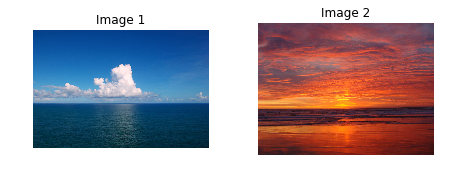

In [5]:
pl.figure(1, figsize=(6.4, 3))
pl.subplot(1, 2, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.imshow(I2)
pl.axis('off')
pl.title('Image 2')
pl.tight_layout()

Plot pixel values distribution
------------------------------



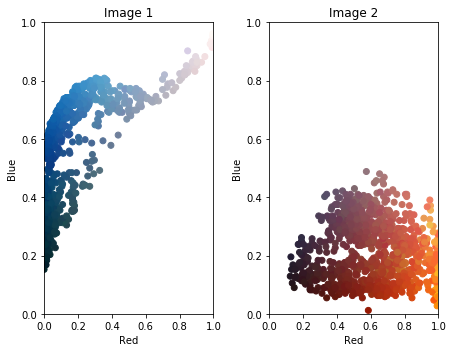

In [6]:
pl.figure(2, figsize=(6.4, 5))

pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 2], c=Xs)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 2], c=Xt)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 2')
pl.tight_layout()

Plot transformed images
-----------------------



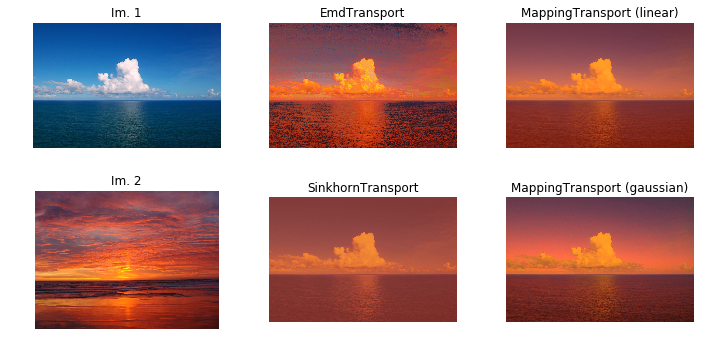

In [7]:
pl.figure(2, figsize=(10, 5))

pl.subplot(2, 3, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Im. 1')

pl.subplot(2, 3, 4)
pl.imshow(I2)
pl.axis('off')
pl.title('Im. 2')

pl.subplot(2, 3, 2)
pl.imshow(Image_emd)
pl.axis('off')
pl.title('EmdTransport')

pl.subplot(2, 3, 5)
pl.imshow(Image_sinkhorn)
pl.axis('off')
pl.title('SinkhornTransport')

pl.subplot(2, 3, 3)
pl.imshow(Image_mapping_linear)
pl.axis('off')
pl.title('MappingTransport (linear)')

pl.subplot(2, 3, 6)
pl.imshow(Image_mapping_gaussian)
pl.axis('off')
pl.title('MappingTransport (gaussian)')
pl.tight_layout()

pl.show()